Exercise

1. Load the dataset
2. Normalize the dataset
3. Create a subset of the dataset that consists of mpg and displacement
4. Cluster the dataset (subset) using Agglomerative Clustering

In [1]:
# Import the standard module(s) to be used in this lab
import pandas as pd
import numpy as np
%matplotlib inline


#### Load the dataset


In [2]:
# import dataset
#auto_pd = pd.read_csv("auto_mpg.csv", sep=" ")
auto_pd = pd.read_csv('https://raw.githubusercontent.com/abdo-projects/data-science-portfolio/main/Dataset/auto_mpg.csv', delimiter=r"\s+")


In [3]:
# look at the first five data
auto_pd.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Create a subset of the dataset that consists of mpg and displacement

In [4]:
sub_auto_pd = auto_pd[['mpg','displacement']]

In [5]:
sub_auto_pd.head()

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0


In [6]:
sub_auto_pd.describe()

,mpg,displacement
count,398.000000,398.000000
mean,23.514573,193.425879
std,7.815984,104.269838
min,9.000000,68.000000
25%,17.500000,104.250000
50%,23.000000,148.500000
75%,29.000000,262.000000
max,46.600000,455.000000


#### Normalize the dataset

In [7]:
# Standardization (Standard Scalar) 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(sub_auto_pd)
df = pd.DataFrame(data_scaled, columns = ['mpg','displacement'])

In [8]:
df.head()

,mpg,displacement
0,-0.706439,1.090604
1,-1.090751,1.503514
2,-0.706439,1.196232
3,-0.962647,1.061796
4,-0.834543,1.042591


<AxesSubplot:xlabel='mpg', ylabel='displacement'>

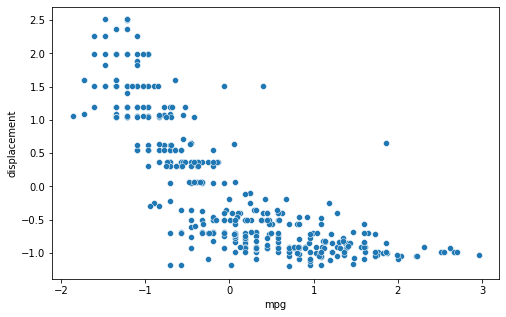

In [9]:
# set the backend of matplotlib to 'inline' to display the plot within Jupyter notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["mpg"], y=df["displacement"])


In [10]:
# Robust Scalar (Scaling to median and quantiles) 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(sub_auto_pd)
df = pd.DataFrame(data_scaled, columns = ['mpg','displacement'])

In [11]:
df.head()

,mpg,displacement
0,-0.434783,1.004754
1,-0.695652,1.277338
2,-0.434783,1.074485
3,-0.608696,0.985737
4,-0.521739,0.973059


<AxesSubplot:xlabel='mpg', ylabel='displacement'>

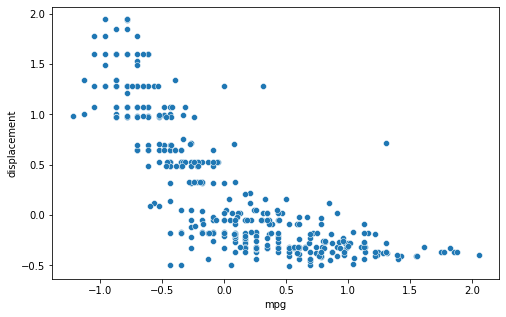

In [12]:
# set the backend of matplotlib to 'inline' to display the plot within Jupyter notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["mpg"], y=df["displacement"])


In [13]:
#the data is scaled to a fixed range — usually 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(sub_auto_pd)
df = pd.DataFrame(data_scaled, columns = ['mpg','displacement'])


In [14]:
df.head()

,mpg,displacement
0,0.239362,0.617571
1,0.159574,0.728682
2,0.239362,0.645995
3,0.186170,0.609819
4,0.212766,0.604651


<AxesSubplot:xlabel='mpg', ylabel='displacement'>

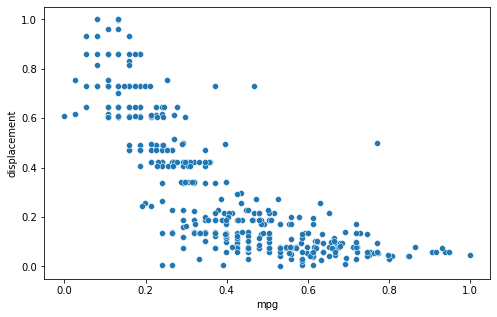

In [15]:
# set the backend of matplotlib to 'inline' to display the plot within Jupyter notebook
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["mpg"], y=df["displacement"])

#### Cluster the dataset (subset) using Agglomerative Clustering

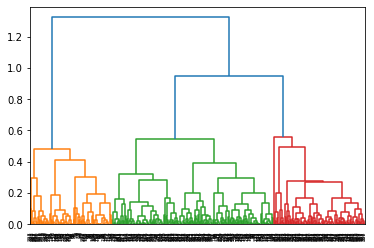

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df, 'complete')
dendrogram(linked, orientation='top', distance_sort='ascending',
show_leaf_counts=False)
plt.show()


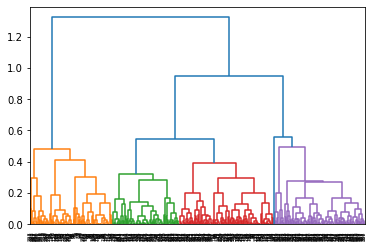

In [17]:
dendrogram(linked, orientation='top', distance_sort='ascending',
show_leaf_counts=False, color_threshold=0.5)
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5) # using ward linkage by default
pred = model.fit_predict(df)

<AxesSubplot:xlabel='mpg', ylabel='displacement'>

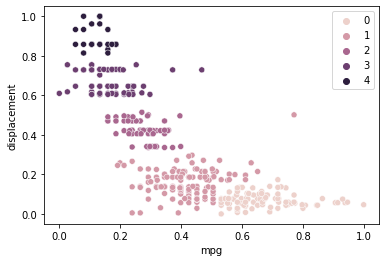

In [19]:
sns.scatterplot(x=df["mpg"], y=df["displacement"], hue=pred)
